# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# for Q-Q plots
import scipy.stats as stats
#for scaling
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

##  <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First download the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path,decimal=',')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


##  <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

<AxesSubplot:>

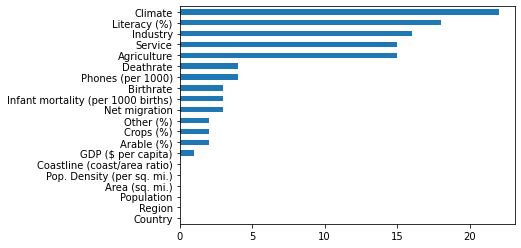

In [6]:
df.isna().sum().sort_values().plot(kind="barh")

In [7]:
# This will print basic statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


In [8]:
#make a copy for the original dataset
df_copy=df.copy()

**First issue**

### checking the null values

In [10]:
df_copy.isnull().mean().sort_values(ascending=False)

Climate                               0.096916
Literacy (%)                          0.079295
Industry                              0.070485
Service                               0.066079
Agriculture                           0.066079
Deathrate                             0.017621
Phones (per 1000)                     0.017621
Infant mortality (per 1000 births)    0.013216
Net migration                         0.013216
Birthrate                             0.013216
Arable (%)                            0.008811
Crops (%)                             0.008811
Other (%)                             0.008811
GDP ($ per capita)                    0.004405
Region                                0.000000
Coastline (coast/area ratio)          0.000000
Pop. Density (per sq. mi.)            0.000000
Area (sq. mi.)                        0.000000
Population                            0.000000
Country                               0.000000
dtype: float64

In [11]:
#getting the names for null columns
null_cols=list(df_copy.isnull().mean().sort_values(ascending=False).index[:-6]) #they are are less than 20% absent
print(null_cols)

['Climate', 'Literacy (%)', 'Industry', 'Service', 'Agriculture', 'Deathrate', 'Phones (per 1000)', 'Infant mortality (per 1000 births)', 'Net migration', 'Birthrate', 'Arable (%)', 'Crops (%)', 'Other (%)', 'GDP ($ per capita)']


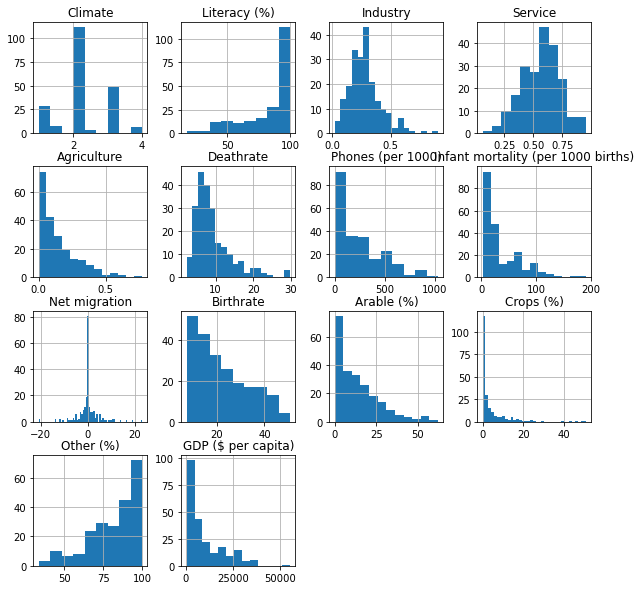

In [12]:
df_copy[null_cols].hist(bins="auto", figsize=(10,10))
plt.show()

In [13]:
#SOLUTION
imputer = SimpleImputer(strategy='median')

# we fit the imputer to the train set
# the imputer will learn the median of all variables
#imputer.fit(df_copy[null_cols])
X = imputer.fit_transform(df_copy[null_cols])
data=pd.DataFrame(X, columns=null_cols)

In [14]:
data.isnull().sum()

Climate                               0
Literacy (%)                          0
Industry                              0
Service                               0
Agriculture                           0
Deathrate                             0
Phones (per 1000)                     0
Infant mortality (per 1000 births)    0
Net migration                         0
Birthrate                             0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
GDP ($ per capita)                    0
dtype: int64

In [15]:
#getting the names of columns that don't have mssing data and conacatenating it tp data after median imputation
mis=list(set(df_copy.columns)-set(null_cols))
data_imp=pd.concat([data,df_copy[mis]],axis=1)
data_imp.head()

,Climate,Literacy (%),Industry,Service,Agriculture,Deathrate,Phones (per 1000),Infant mortality (per 1000 births),Net migration,Birthrate,Arable (%),Crops (%),Other (%),GDP ($ per capita),Area (sq. mi.),Country,Region,Population,Coastline (coast/area ratio),Pop. Density (per sq. mi.)
0,1.0,36.0,0.240,0.380,0.380,20.34,3.2,163.07,23.06,46.60,12.13,0.22,87.65,700.0,647500,Afghanistan,ASIA (EX. NEAR EAST),31056997,0.00,48.0
1,3.0,86.5,0.188,0.579,0.232,5.22,71.2,21.52,-4.93,15.11,21.09,4.42,74.49,4500.0,28748,Albania,EASTERN EUROPE,3581655,1.26,124.6
2,1.0,70.0,0.600,0.298,0.101,4.61,78.1,31.00,-0.39,17.14,3.22,0.25,96.53,6000.0,2381740,Algeria,NORTHERN AFRICA,32930091,0.04,13.8
3,2.0,97.0,0.272,0.571,0.099,3.27,259.5,9.27,-20.71,22.46,10.00,15.00,75.00,8000.0,199,American Samoa,OCEANIA,57794,58.29,290.4
4,3.0,100.0,0.272,0.571,0.099,6.25,497.2,4.05,6.60,8.71,2.22,0.00,97.78,19000.0,468,Andorra,WESTERN EUROPE,71201,0.00,152.1


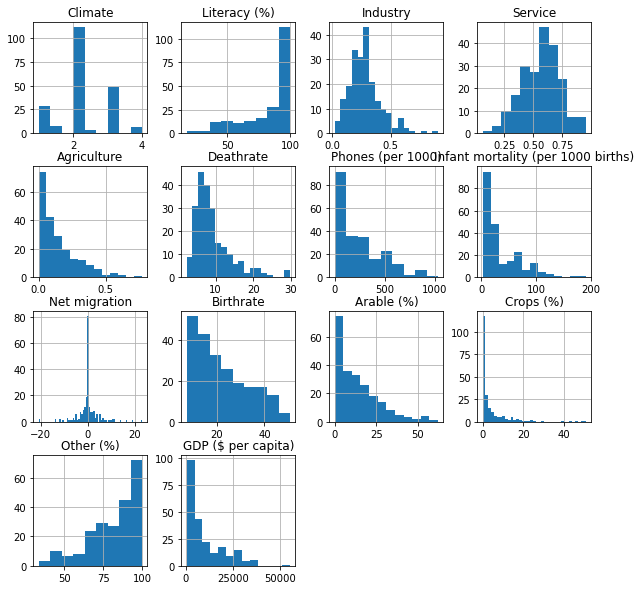

In [16]:
#showing distribution for data before median imputation
df_copy[null_cols].hist(bins="auto", figsize=(10,10))
plt.show()

In [18]:
#the distribution is almost the same except for the capacity there is some distortion in distribution
# i chose median imputation here since the data is missing at random and a very small percentage of data is missing

### Checking Outliers

In [19]:
#checking outliers
cols_num=list(data_imp.select_dtypes(exclude='object').columns)

In [20]:
# function to create histogram, Q-Q plot and
# boxplot. 
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

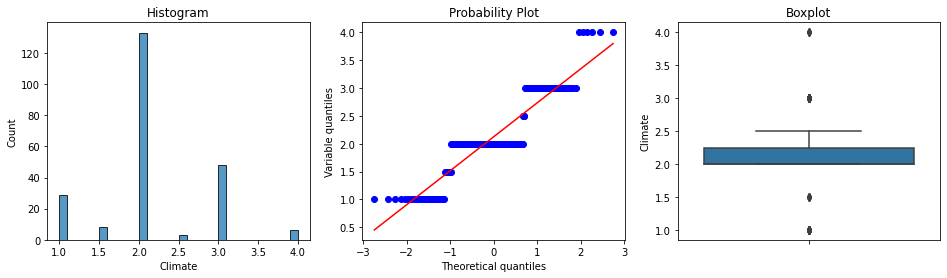

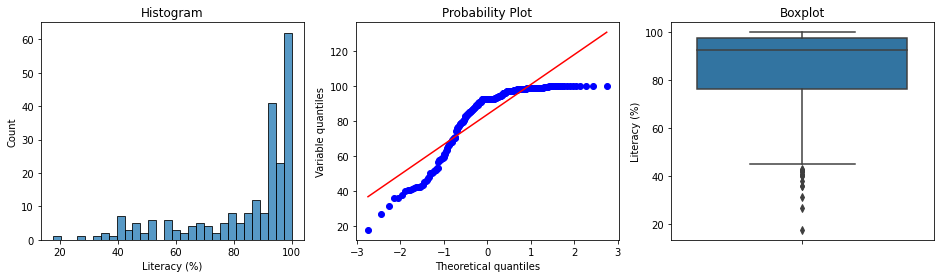

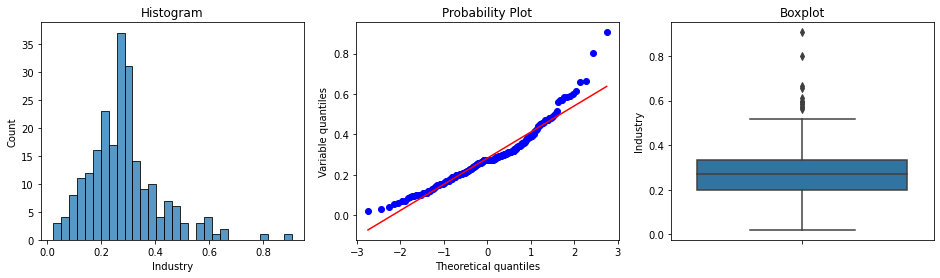

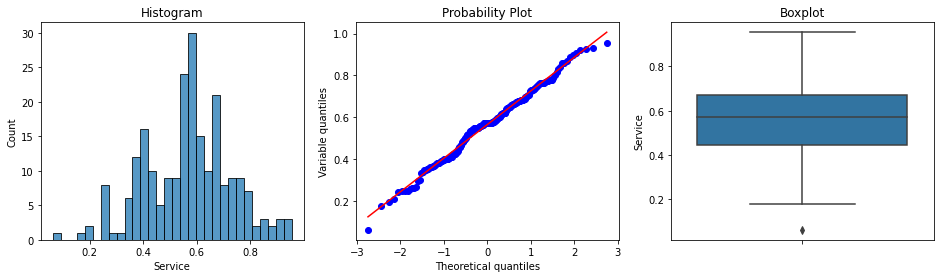

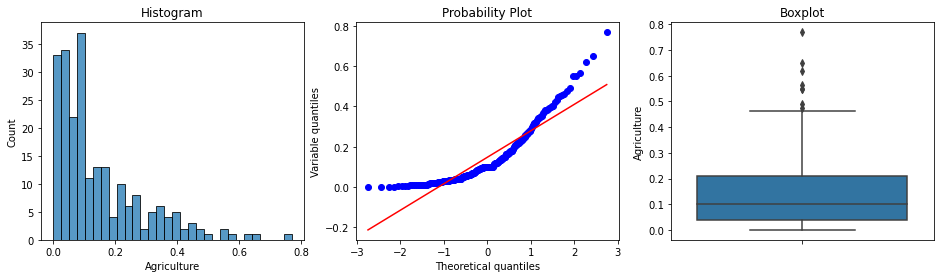

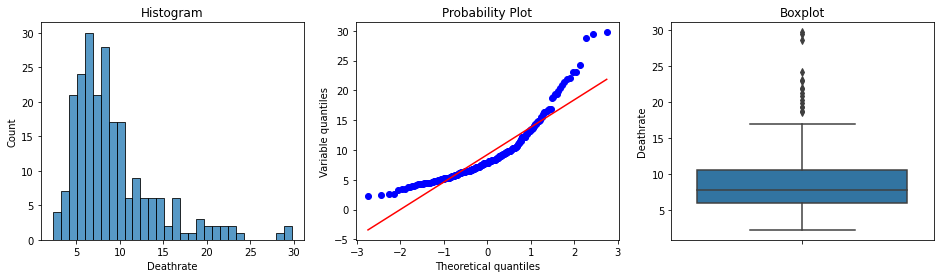

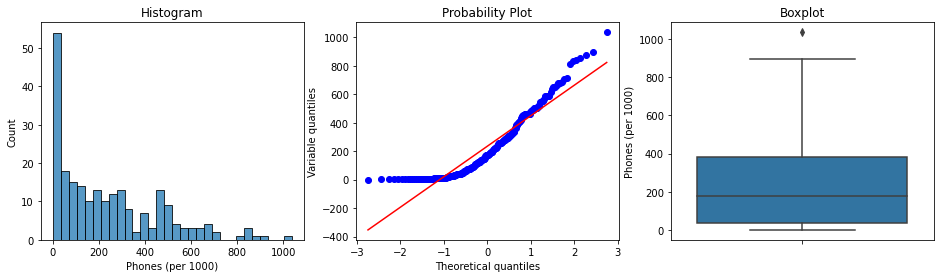

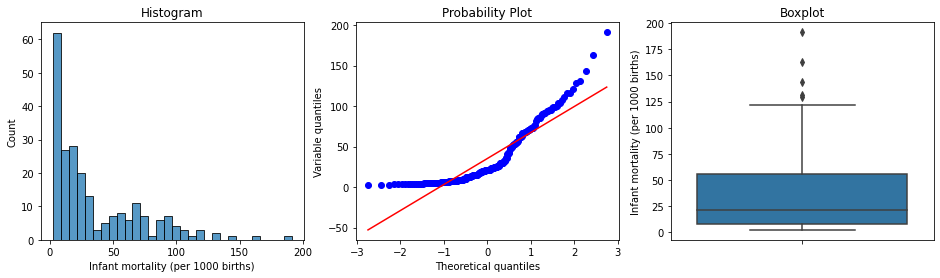

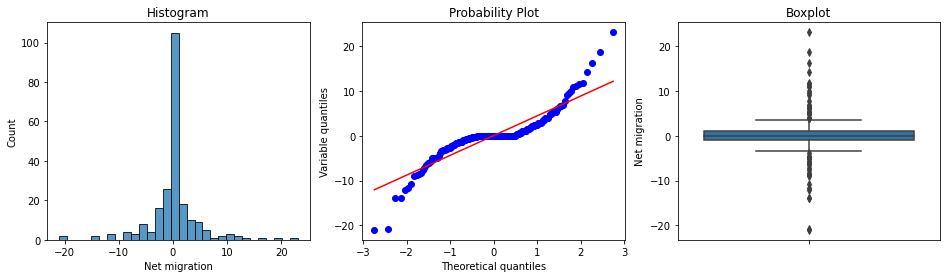

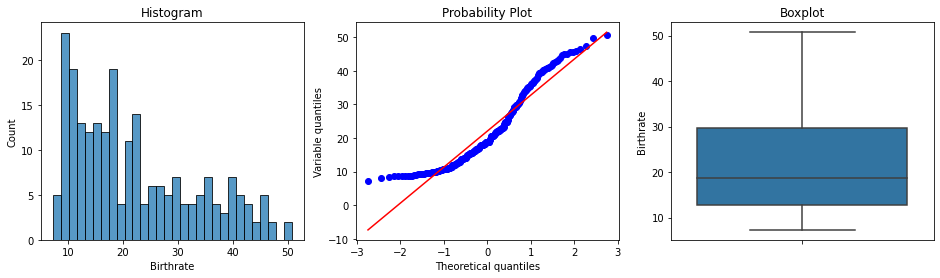

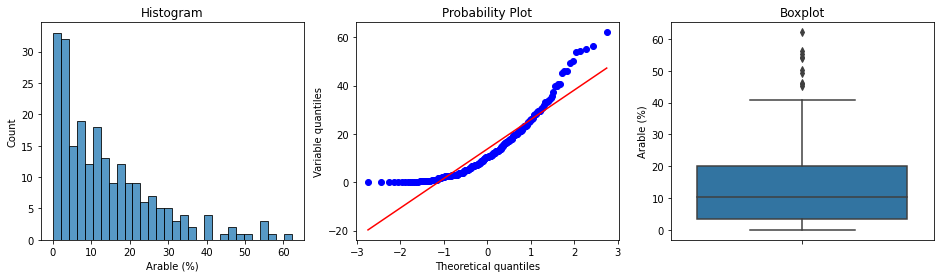

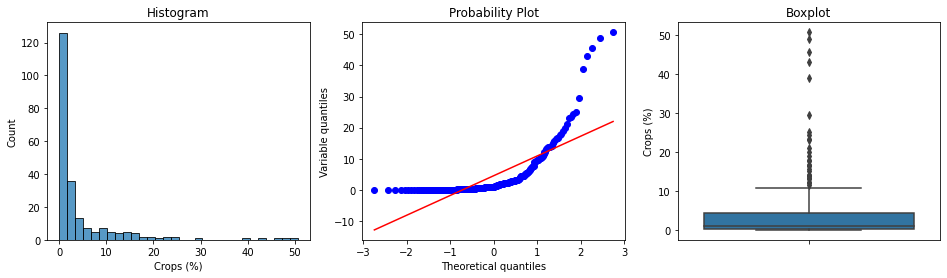

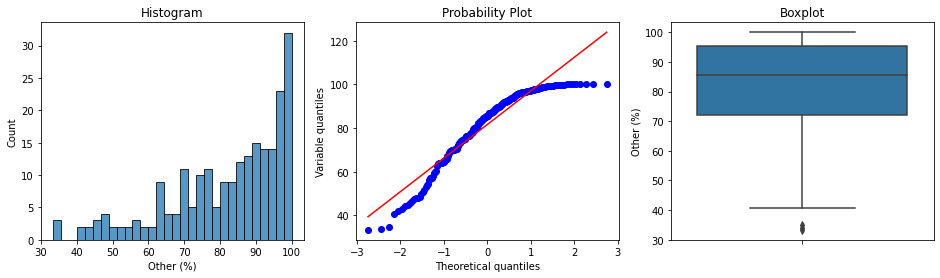

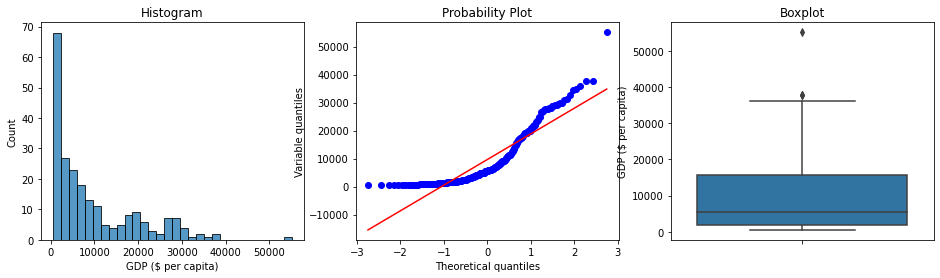

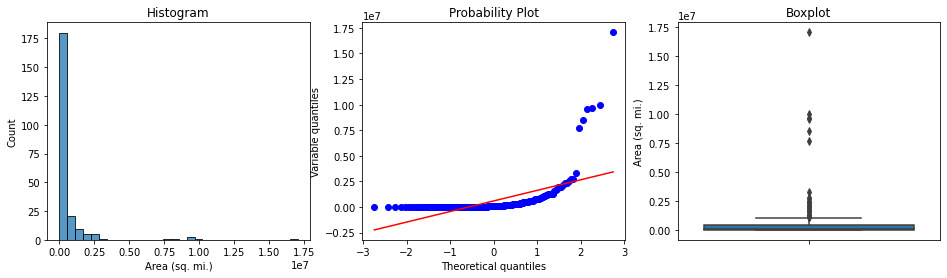

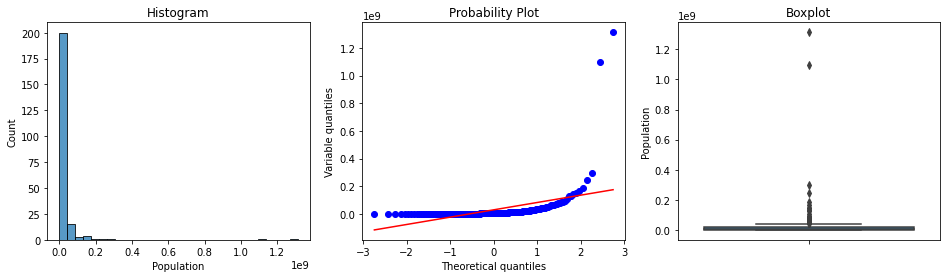

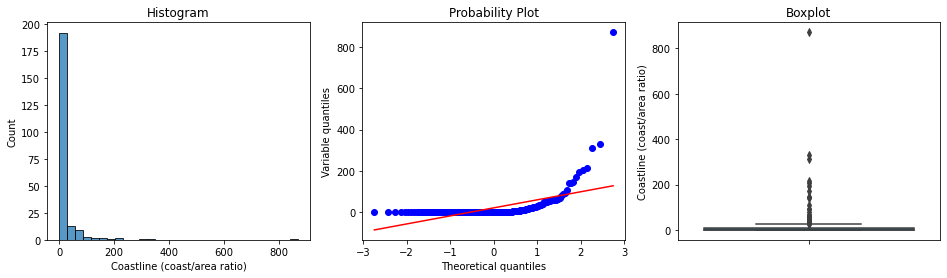

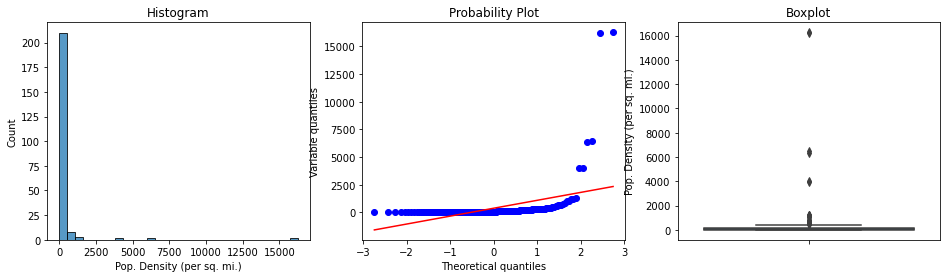

In [21]:
for i in cols_num:
    diagnostic_plots(data_imp,i)  #I chose to replace outliers for Literacy (%),Industry,agriculture,deathrate,infant mortality,arabie

In [22]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

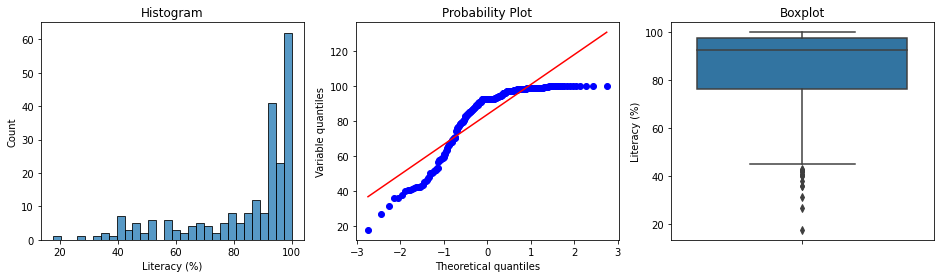

In [23]:
#showing diagnostic plot for literacy
diagnostic_plots(data_imp,'Literacy (%)')

In [24]:
# find limits for Literacy (%)

lit_upper_limit, lit_lower_limit = find_skewed_boundaries(data_imp, 'Literacy (%)', 1.5)
lit_upper_limit, lit_lower_limit

(129.89999999999998, 44.30000000000002)

In [25]:
# Now  replace the outliers for literacy by the maximum and minimum limit

data_imp['Literacy (%)']= np.where(data_imp['Literacy (%)'] > lit_upper_limit, lit_upper_limit,
                       np.where(data_imp['Literacy (%)'] < lit_lower_limit, lit_lower_limit, data_imp['Literacy (%)']))

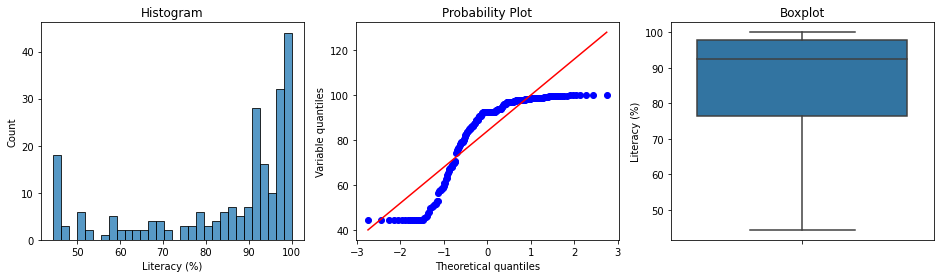

In [26]:
#showing diagnostic plot for literacy
diagnostic_plots(data_imp,'Literacy (%)')

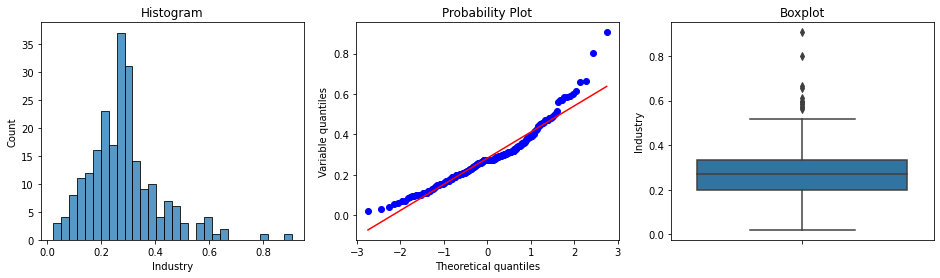

In [27]:
#showing diagnostic plot for 'Industry'
diagnostic_plots(data_imp,'Industry')

In [28]:
# find limits for industry

ind_upper_limit, ind_lower_limit = find_skewed_boundaries(data_imp, 'Industry', 1.5)
ind_upper_limit, ind_lower_limit

(0.5375000000000001, -0.0025000000000000022)

In [29]:
# Now  replace the outliers for literacy by the maximum and minimum limit

data_imp['Industry']= np.where(data_imp['Industry'] > ind_upper_limit, ind_upper_limit,
                       np.where(data_imp['Industry'] <ind_lower_limit, ind_lower_limit, data_imp['Industry']))

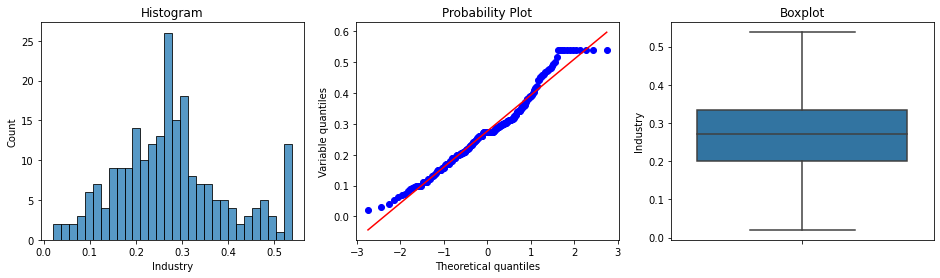

In [30]:
#showing diagnostic plot for 'Industry'
diagnostic_plots(data_imp,'Industry')

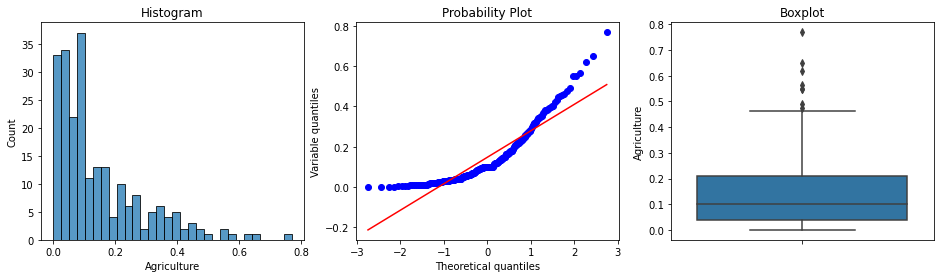

In [31]:
# showing diagnostic plot for agriculture befor capping outliers
diagnostic_plots(data_imp,'Agriculture') 

In [32]:
# find limits for agriculture

agr_upper_limit, agr_lower_limit = find_skewed_boundaries(data_imp, 'Agriculture', 1.5)
agr_upper_limit, agr_lower_limit

(0.4674999999999999, -0.21649999999999994)

In [33]:
# Now  replace the outliers for Agriculture by the maximum and minimum limit

data_imp['Agriculture']= np.where(data_imp['Agriculture'] > agr_upper_limit, agr_upper_limit,
                       np.where(data_imp['Agriculture'] <agr_lower_limit, agr_lower_limit, data_imp['Agriculture']))

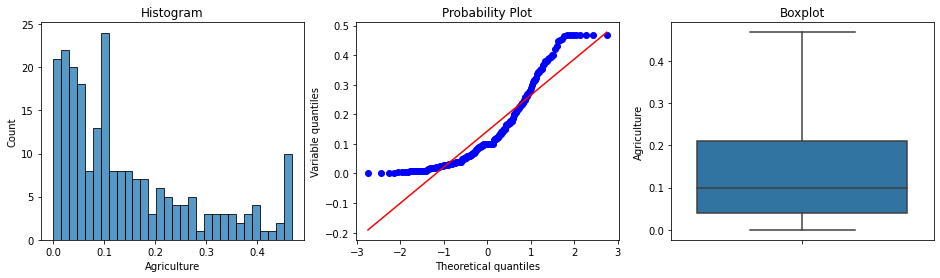

In [34]:
diagnostic_plots(data_imp,'Agriculture') 

In [35]:
# find limits for deathrate

death_upper_limit, death_lower_limit = find_skewed_boundaries(data_imp, 'Deathrate', 1.5)
death_upper_limit, death_lower_limit

(17.4875, -0.932500000000001)

In [36]:
# Now  replace the outliers for deathrate by the maximum and minimum limit
data_imp['Deathrate']= np.where(data_imp['Deathrate'] > death_upper_limit, death_upper_limit,
                       np.where(data_imp['Deathrate'] <death_lower_limit, death_lower_limit, data_imp['Deathrate']))

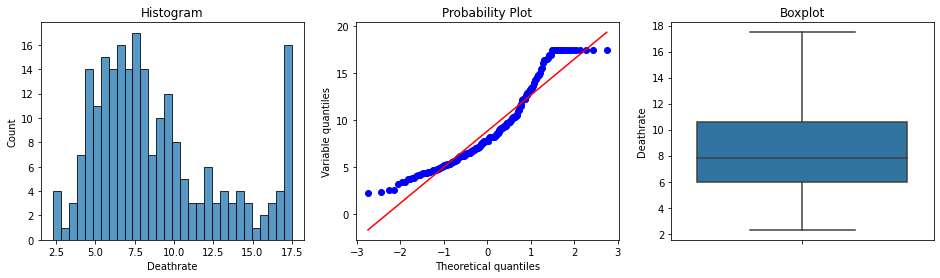

In [37]:
diagnostic_plots(data_imp,'Deathrate') 

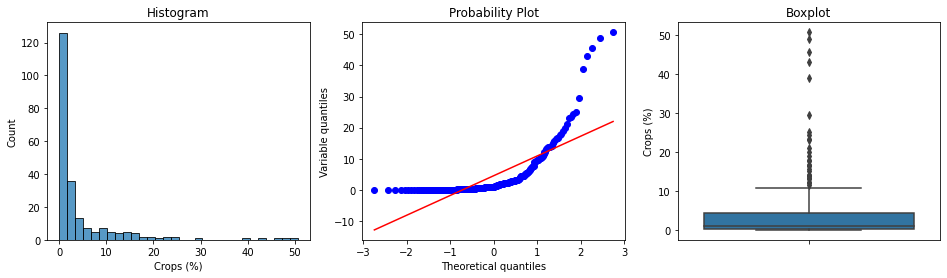

In [38]:
#diagnostic plot for crops before outlier treatment
diagnostic_plots(data_imp,'Crops (%)') 

In [39]:
# find limits for crops
crop_upper_limit, crop_lower_limit = find_skewed_boundaries(data_imp,'Crops (%)', 1.5)
crop_upper_limit, crop_lower_limit

(10.8025, -6.177499999999999)

In [40]:
data_imp['Crops (%)']= np.where(data_imp['Crops (%)'] > crop_upper_limit, crop_upper_limit,
                       np.where(data_imp['Crops (%)'] <crop_lower_limit, crop_lower_limit, data_imp['Crops (%)']))

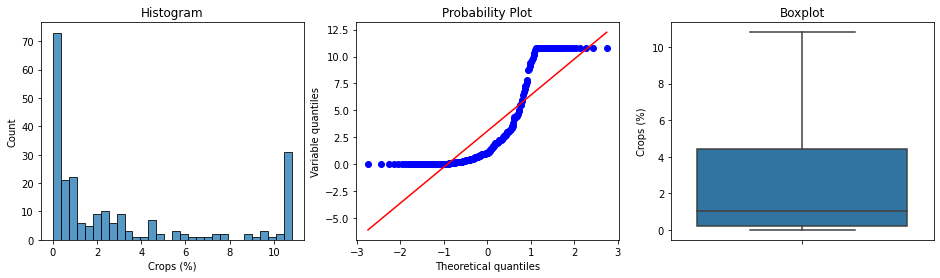

In [41]:
diagnostic_plots(data_imp,'Crops (%)') 

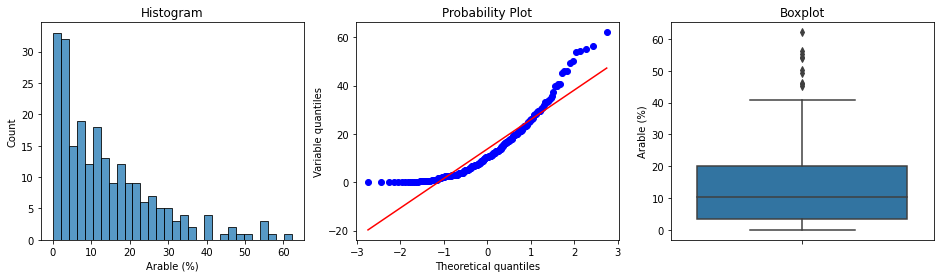

In [42]:
#diagnostic plot before outlier treatment
diagnostic_plots(data_imp,'Arable (%)') 

In [43]:
# find limits for 'Arable (%)'

arab_upper_limit, arab_lower_limit = find_skewed_boundaries(data_imp,'Arable (%)', 1.5)
arab_upper_limit, arab_lower_limit

(44.93, -21.55)

In [44]:
data_imp['Arable (%)']= np.where(data_imp['Arable (%)'] > arab_upper_limit, arab_upper_limit,
                       np.where(data_imp['Arable (%)'] <arab_lower_limit, arab_lower_limit, data_imp['Arable (%)']))

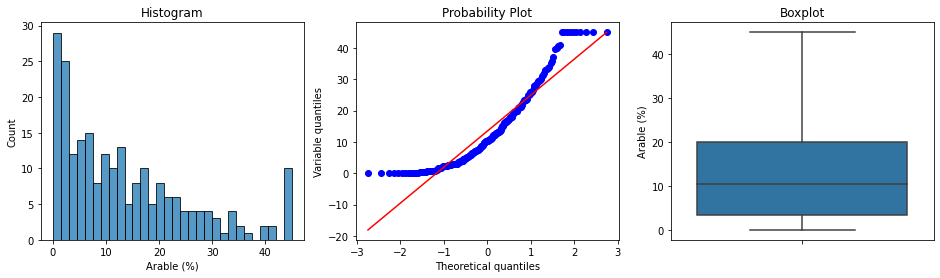

In [45]:
#diagnostic plot for Arable after outlier treatment
diagnostic_plots(data_imp,'Arable (%)') 

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)


- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [46]:
from sklearn import preprocessing

In [47]:
cols_num

['Climate',
 'Literacy (%)',
 'Industry',
 'Service',
 'Agriculture',
 'Deathrate',
 'Phones (per 1000)',
 'Infant mortality (per 1000 births)',
 'Net migration',
 'Birthrate',
 'Arable (%)',
 'Crops (%)',
 'Other (%)',
 'GDP ($ per capita)',
 'Area (sq. mi.)',
 'Population',
 'Coastline (coast/area ratio)',
 'Pop. Density (per sq. mi.)']

In [48]:
data_imp.drop(["Country","Region"],inplace=True,axis=1)
data_std_sc=data_imp.copy()

In [49]:
data_imp[cols_num]=RobustScaler().fit_transform(data_imp[cols_num])
data_std_sc[cols_num]=StandardScaler().fit_transform(data_imp[cols_num])
data_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Climate                             227 non-null    float64
 1   Literacy (%)                        227 non-null    float64
 2   Industry                            227 non-null    float64
 3   Service                             227 non-null    float64
 4   Agriculture                         227 non-null    float64
 5   Deathrate                           227 non-null    float64
 6   Phones (per 1000)                   227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   Net migration                       227 non-null    float64
 9   Birthrate                           227 non-null    float64
 10  Arable (%)                          227 non-null    float64
 11  Crops (%)                           227 non-n

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

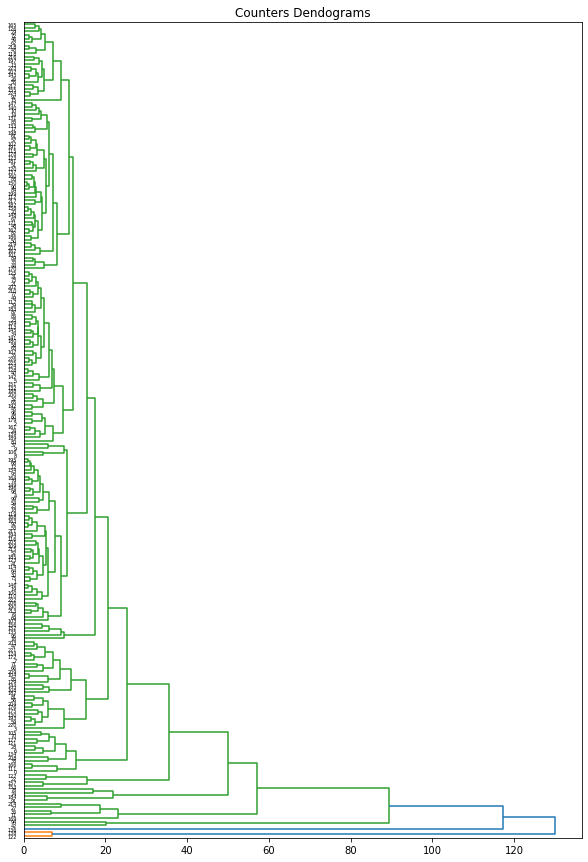

In [51]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 15))
plt.title("Counters Dendograms")
#dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
dend = shc.dendrogram(shc.linkage(y=data_imp , method='complete', metric='euclidean'),orientation='right')

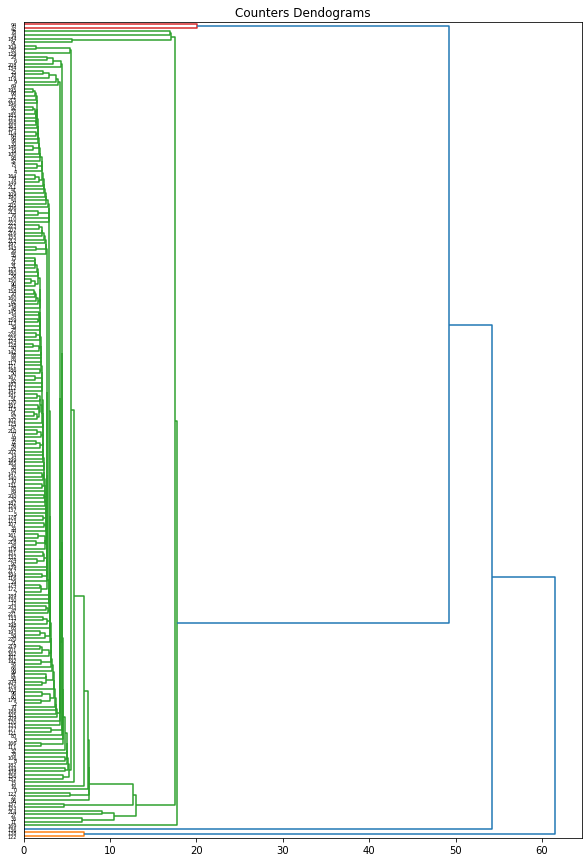

In [52]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 15))
plt.title("Counters Dendograms")
#dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
dend = shc.dendrogram(shc.linkage(y=data_imp , method='single', metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

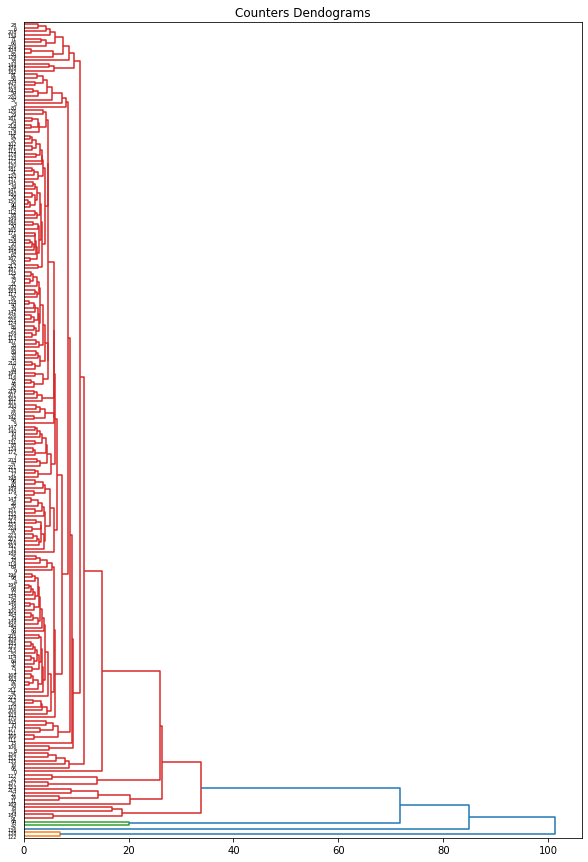

In [53]:
plt.figure(figsize=(10, 15))
plt.title("Counters Dendograms")
#dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
dend = shc.dendrogram(shc.linkage(y=data_imp , method='average', metric='euclidean'),orientation='right')

## training






Text(0, 0.5, 'silhoutte scoe')

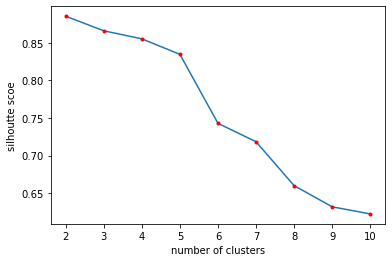

In [54]:

# running the algorith with dif number of clusters and linkage single
scores=[]

for i in range(2,11):
    scores.append(silhouette_score(data_imp,AgglomerativeClustering(n_clusters=i,linkage="single").fit_predict(data_imp)))
plt.plot(range(2,11),scores) 
plt.plot(range(2,11),scores,'.r')
plt.xlabel("number of clusters")
plt.ylabel("silhoutte scoe")

Text(0, 0.5, 'silhoutte scoe')

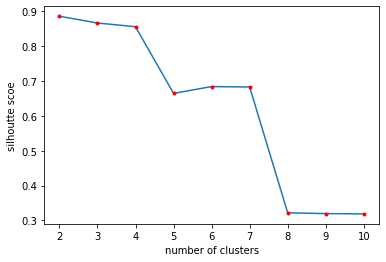

In [55]:
# running the algorith with dif number of clusters and linkage single
scores=[]

for i in range(2,11):
    scores.append(silhouette_score(data_imp,AgglomerativeClustering(n_clusters=i,linkage="complete").fit_predict(data_imp)))
plt.plot(range(2,11),scores) 
plt.plot(range(2,11),scores,'.r')
plt.xlabel("number of clusters")
plt.ylabel("silhoutte scoe")
#plt.axis("off")

In [56]:
# the robust scaler gave better results than standard scaler

Text(0, 0.5, 'silhoutte scoe')

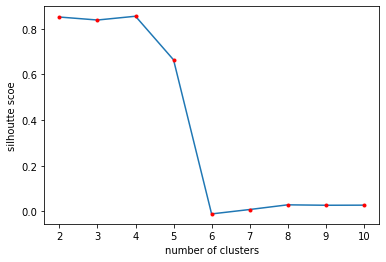

In [57]:
#data_std_sc
#running the algorithm with dif number of clusters linkage complete on data after standard scaling
scores=[]

for i in range(2,11):
    scores.append(silhouette_score(data_imp,AgglomerativeClustering(n_clusters=i,linkage="complete").fit_predict(data_std_sc)))
plt.plot(range(2,11),scores) 
plt.plot(range(2,11),scores,'.r')
plt.xlabel("number of clusters")
plt.ylabel("silhoutte scoe")